# Business Objective
## An E Commerce company or DTH (you can choose either of these two domains) provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model  through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.You have been assigned to develop a churn prediction model for this company and provide business recommendations on the campaign. Your campaign suggestion should be unique and be very clear on the campaign offer because your recommendation will go through the revenue assurance team. If they find that you aregiving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going to approve your recommendation.

In [664]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [665]:
churn=pd.read_excel("Customer Churn Data.xlsx", sheet_name = 'Data for DSBA')

In [666]:
churn.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


## DATA DICTIONARY
AccountID - account unique identifier

Churn- account churn flag (Target)

Tenure - Tenure of account

City_Tier-	Tier of primary customer's city

CC_Contacted_L12m - How many times all the customers of the account has contacted customer care in last 12months

Payment	Preferred  -  Payment mode of the customers in the account

Gender - Gender of the primary customer of the account

Service_Score - Satisfaction score given by customers of the account on service provided by company

Account_user_count - Number of customers tagged with this account

account_segment	 - Account segmentation on the basis of spend

CC_Agent_Score - Satisfaction score given by customers of the account on customer care service provided by company

Marital_Status - Marital status of the primary customer of the account

rev_per_month - Monthly average revenue generated by account in last 12 months

Complain_l12m - Any complaints has been raised by account in last 12 months

rev_growth_yoy - revenue growth percentage of the account (last 12 months vs last 24 to 13 month)

coupon_used_l12m - How many times customers have used coupons to do the payment in last 12 months

Day_Since_CC_connect - 	Number of days since no customers in the account has contacted the customer care

cashback_l12m - Monthly average cashback generated by account in last 12 months

Login_device - Preferred login device of the customers in the account


In [667]:
churn.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


### Size of the dataset

In [668]:
churn.size

213940

### Shape of the dataset

In [669]:
# checking shape of dataset
print("The shape of dataset is :{}".format(churn.shape))

The shape of dataset is :(11260, 19)


In [522]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [419]:
# This data set contains 5 columns of float data types, 2 of integer data types and 12 of object types. The memory usage is 1.6+
# There are many missing values. rev_per_month is object,Tenure, cashback Day_Since_CC_connect, rev_growth_yoy are object whereas they should be integer.

In [670]:
churn.drop("AccountID", axis=1, inplace=True)

# Checking why numerical column are objects

### Checking feature Tenure

In [671]:
churn.Tenure.unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [8]:
churn.Tenure.value_counts()

1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64

In [422]:
# We can see # dollar sign is appearing 116 times. This is why feature tenure is an object.It also has nan.

### Checking feature Account_user_count

In [672]:
churn.Account_user_count.value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [424]:
# Account_user_count has 332 @ sign.

### Checking feature rev_growth_yoy

In [673]:
churn.rev_growth_yoy.value_counts() 

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
$        3
4        3
Name: rev_growth_yoy, dtype: int64

In [426]:
# We can see # dollar sign is appearing 3 times

### Checking feature rev_per_month

In [674]:
churn.rev_per_month.value_counts() 

3      1746
2      1585
5      1337
4      1218
6      1085
7       754
+       689
8       643
9       564
10      413
1       402
11      278
12      166
13       93
14       48
15       24
102       8
123       5
124       5
107       5
136       4
140       4
118       4
133       4
129       4
115       3
117       3
138       3
101       3
110       3
137       3
119       3
108       3
127       3
116       3
126       3
130       3
113       3
120       2
19        2
131       2
139       2
114       2
125       2
22        2
121       2
105       2
134       2
20        1
23        1
122       1
21        1
104       1
25        1
135       1
111       1
109       1
100       1
103       1
Name: rev_per_month, dtype: int64

In [529]:
# We can observe + sign is appearing 689 times.This is why this feature appears to be an object.

### Checking feature Day_Since_CC_connect

In [675]:
churn.Day_Since_CC_connect.value_counts() 

3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
30       2
31       2
47       2
$        1
46       1
Name: Day_Since_CC_connect, dtype: int64

In [531]:
# Day_Since_CC_connect has a $ sign. This is why this feature appears to be an object

### Check feature cashback

In [676]:
churn.cashback.value_counts().sort_values( ascending = False)

155.62    10
154.73     9
145.08     9
149.68     9
152.28     9
          ..
228.91     1
192.42     1
188.93     1
149.90     1
191.42     1
Name: cashback, Length: 5693, dtype: int64

In [677]:
df1=pd.DataFrame(churn.cashback.str.isdigit())

In [678]:
df1[churn.cashback == False]

,cashback
101,NaN
1026,NaN
1176,NaN
1255,NaN


In [535]:
# cash back has Nan

### Check feature coupon_used_for_payment

In [679]:
churn.coupon_used_for_payment.value_counts().sort_values( ascending = False)

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
9       34
10      34
11      30
12      26
13      22
14      12
15       4
16       4
#        1
$        1
*        1
Name: coupon_used_for_payment, dtype: int64

In [537]:
#Coupon_used_for_payment has #, $ and *

In [538]:
# Inference: it can be observed that this feature is really messy.

### Descriptive Summary of numerical features

In [680]:
churn.describe()

,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.000000,11148.000000,11158.000000,11162.000000,11144.000000,10903.000000
mean,0.168384,1.653929,17.867091,2.902526,3.066493,0.285334
std,0.374223,0.915015,8.853269,0.725584,1.379772,0.451594
min,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


In [540]:
# CC_Contacted_LY is having highest standard deviation

### Descriptive Summary of complete data

In [681]:

# describing data including object variable as well
churn.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,11144.0,NaN,NaN,NaN,3.066493,1.379772,1.0,2.0,3.0,4.0,5.0


### Check missing data in all the columns

In [682]:
# checking for null values
churn.isnull().sum().sort_values(ascending= False)

cashback                   471
Day_Since_CC_connect       357
Complain_ly                357
Login_device               221
Marital_Status             212
CC_Agent_Score             116
Account_user_count         112
City_Tier                  112
Payment                    109
Gender                     108
Tenure                     102
rev_per_month              102
CC_Contacted_LY            102
Service_Score               98
account_segment             97
rev_growth_yoy               0
coupon_used_for_payment      0
Churn                        0
dtype: int64

In [543]:
# cashback has highest null.

### percentage of missing data

In [683]:
churn.isnull().sum().sort_values(ascending= False)/len(churn)*100

cashback                   4.182948
Day_Since_CC_connect       3.170515
Complain_ly                3.170515
Login_device               1.962700
Marital_Status             1.882771
CC_Agent_Score             1.030195
Account_user_count         0.994671
City_Tier                  0.994671
Payment                    0.968028
Gender                     0.959147
Tenure                     0.905861
rev_per_month              0.905861
CC_Contacted_LY            0.905861
Service_Score              0.870337
account_segment            0.861456
rev_growth_yoy             0.000000
coupon_used_for_payment    0.000000
Churn                      0.000000
dtype: float64

### Total missing data

In [684]:
churn.isnull().sum().sum()

2676

In [685]:
# kest check kurtosis and skewness of data
print("kurtosis and skewness of dataste is as below")
pd.DataFrame(data = [churn.kurtosis(), churn.skew()], index=['Kurtosis','Skewness']).T.round(2)

kurtosis and skewness of dataste is as below


,Kurtosis,Skewness
Churn,1.14,1.77
City_Tier,-1.40,0.74
CC_Contacted_LY,8.23,1.42
Service_Score,-0.67,0.00
CC_Agent_Score,-1.12,-0.14
Complain_ly,-1.10,0.95


## Check Covariance

In [686]:
churn.cov()

,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
Churn,0.140043,0.028821,0.238738,0.002442,0.054599,0.042520
City_Tier,0.028821,0.837253,0.095796,-0.004278,-0.014494,0.001025
CC_Contacted_LY,0.238738,0.095796,78.380380,0.385968,-0.002556,0.108939
Service_Score,0.002442,-0.004278,0.385968,0.526472,0.032191,0.000866
CC_Agent_Score,0.054599,-0.014494,-0.002556,0.032191,1.903772,-0.019649
Complain_ly,0.042520,0.001025,0.108939,0.000866,-0.019649,0.203937


## Check Correlation

In [687]:
churn.corr()

,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
Churn,1.000000,0.084135,0.072071,0.008991,0.105796,0.251488
City_Tier,0.084135,1.000000,0.011835,-0.006443,-0.011479,0.002478
CC_Contacted_LY,0.072071,0.011835,1.000000,0.060052,-0.000209,0.027244
Service_Score,0.008991,-0.006443,0.060052,1.000000,0.032135,0.002643
CC_Agent_Score,0.105796,-0.011479,-0.000209,0.032135,1.000000,-0.031459
Complain_ly,0.251488,0.002478,0.027244,0.002643,-0.031459,1.000000


## Check Duplicates

In [688]:
dups = churn.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 259


In [550]:
# There are no duplicate rows

## EDA before cleaning the data

## Uni-Variate Analysis

## Target Variable Churn

In [689]:
churn.Churn.value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [690]:
churn.Churn.value_counts(normalize= True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

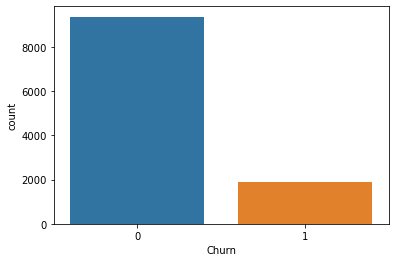

In [691]:
sns.countplot(churn["Churn"]);

In [554]:
# This data is highly imbalanced. 16% churn while 83% do not churn.

## Feature City Tier

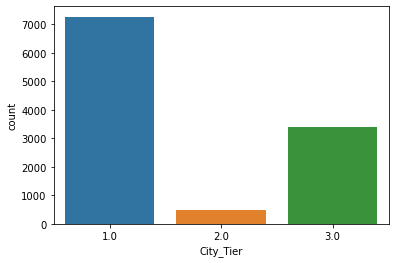

In [692]:
sns.countplot(churn["City_Tier"]);

In [556]:
# Most of the customers belong to City_Tier1. City_tier 2 has least customers

## Feature Payment

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Debit Card'),
  Text(1, 0, 'UPI'),
  Text(2, 0, 'Credit Card'),
  Text(3, 0, 'Cash on Delivery'),
  Text(4, 0, 'E wallet')])

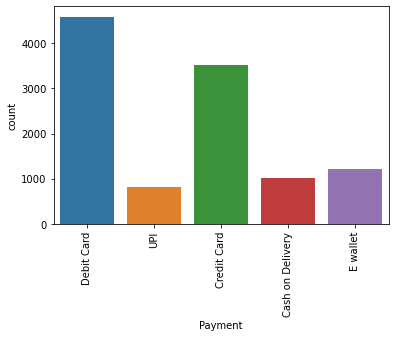

In [694]:
sns.countplot(churn["Payment"]);
plt.xticks(rotation= 90)

## Feature Gender

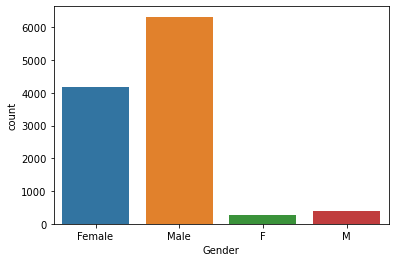

In [695]:
sns.countplot(churn["Gender"]);

## Feature Account_user_count

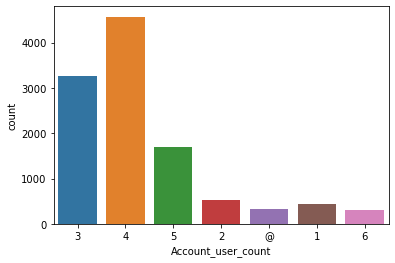

In [696]:
sns.countplot(churn["Account_user_count"]);

## Feature Service_Score

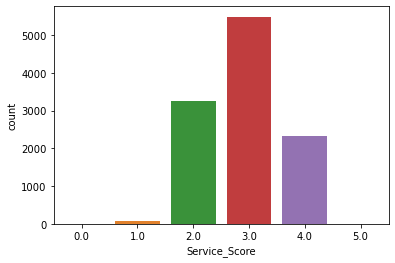

In [697]:
sns.countplot(churn["Service_Score"]);

## Feature account_segment

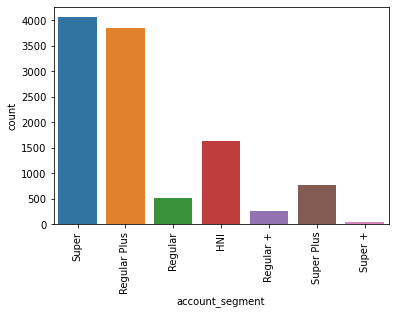

In [698]:
sns.countplot(churn["account_segment"]);
plt.xticks(rotation=90)
plt.show()

## Feature CC_Agent_Score

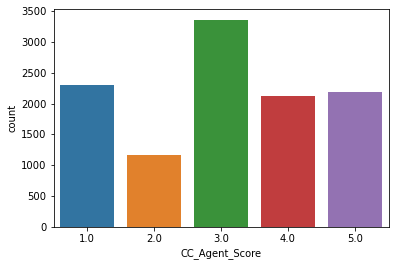

In [699]:
sns.countplot(churn["CC_Agent_Score"]);

## Feature Marital_Status

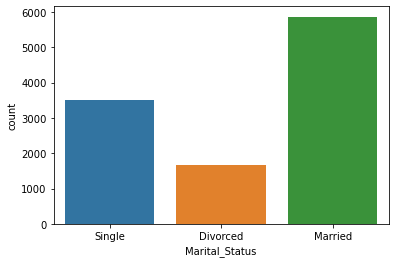

In [700]:
sns.countplot(churn["Marital_Status"]);

## Feature Complain_ly

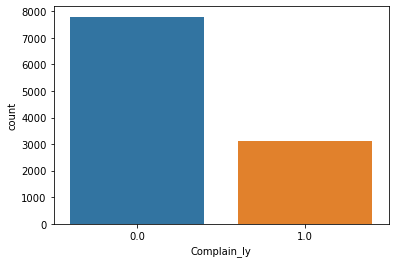

In [701]:
sns.countplot(churn["Complain_ly"]);

## Feature Login Device

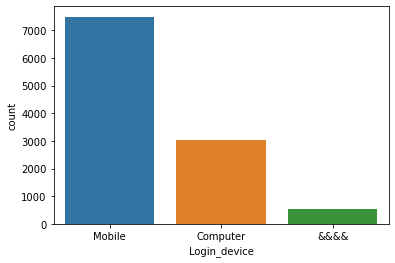

In [702]:
sns.countplot(churn["Login_device"]);

## Bi-Variate and multi variate analysis

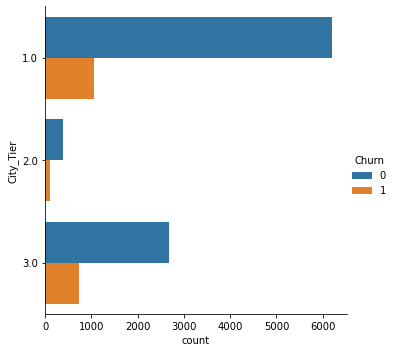

In [703]:
sns.catplot(y="City_Tier", hue="Churn", kind="count", data=churn)

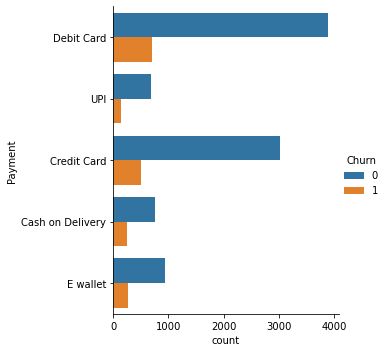

In [704]:
sns.catplot(y="Payment", hue="Churn", kind="count", data=churn)

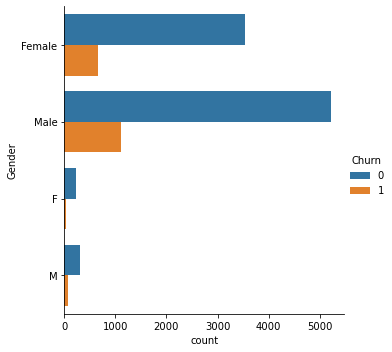

In [705]:
sns.catplot(y="Gender", hue="Churn", kind="count", data=churn)

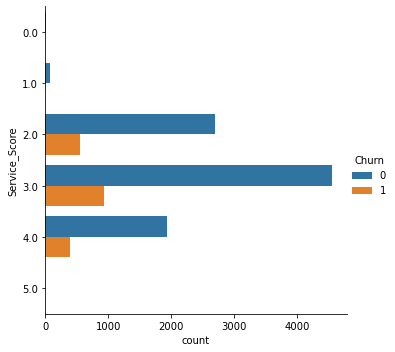

In [706]:
sns.catplot(y="Service_Score", hue="Churn", kind="count", data=churn)

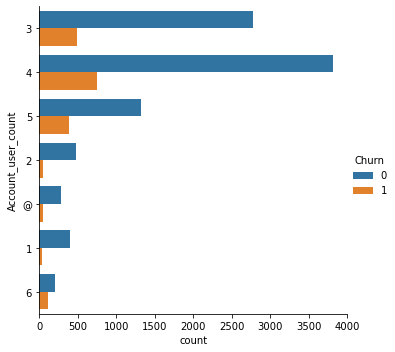

In [707]:
sns.catplot(y="Account_user_count", hue="Churn", kind="count", data=churn)

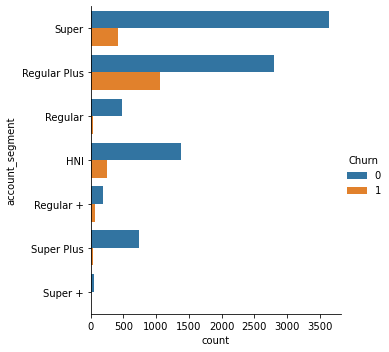

In [708]:
sns.catplot(y="account_segment", hue="Churn", kind="count", data=churn)

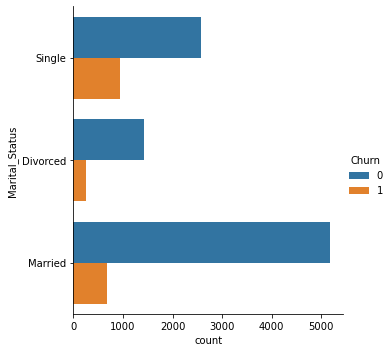

In [709]:
sns.catplot(y="Marital_Status", hue="Churn", kind="count", data=churn)

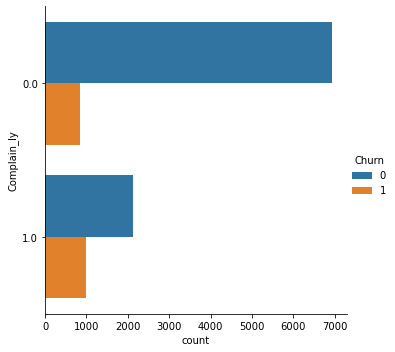

In [710]:
sns.catplot(y="Complain_ly", hue="Churn", kind="count", data=churn)

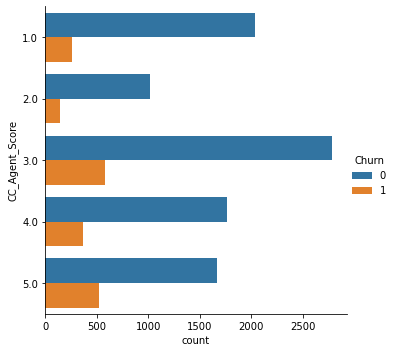

In [711]:
sns.catplot(y="CC_Agent_Score", hue="Churn", kind="count", data=churn)

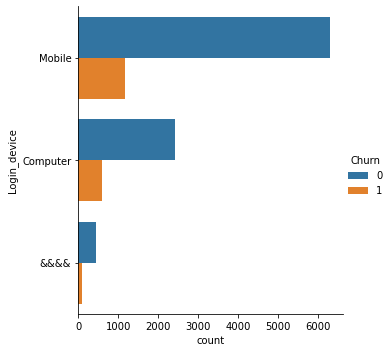

In [712]:
sns.catplot(y="Login_device", hue="Churn", kind="count", data=churn)

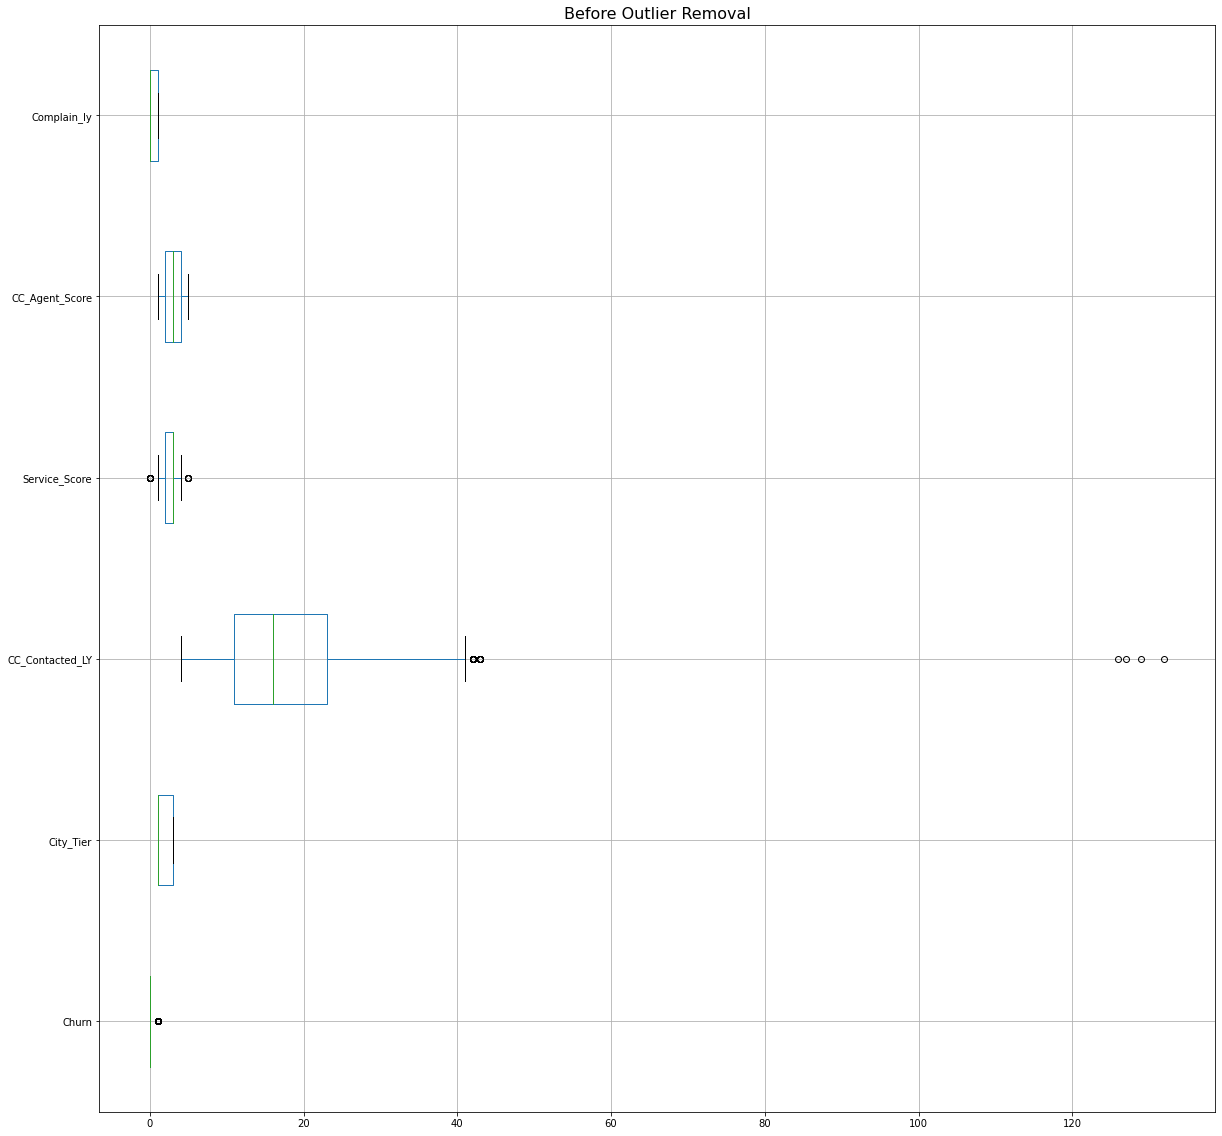

In [713]:
plt.figure(figsize=(20,20))
churn.boxplot(vert=0)
plt.title('Before Outlier Removal',fontsize=16)
plt.show()


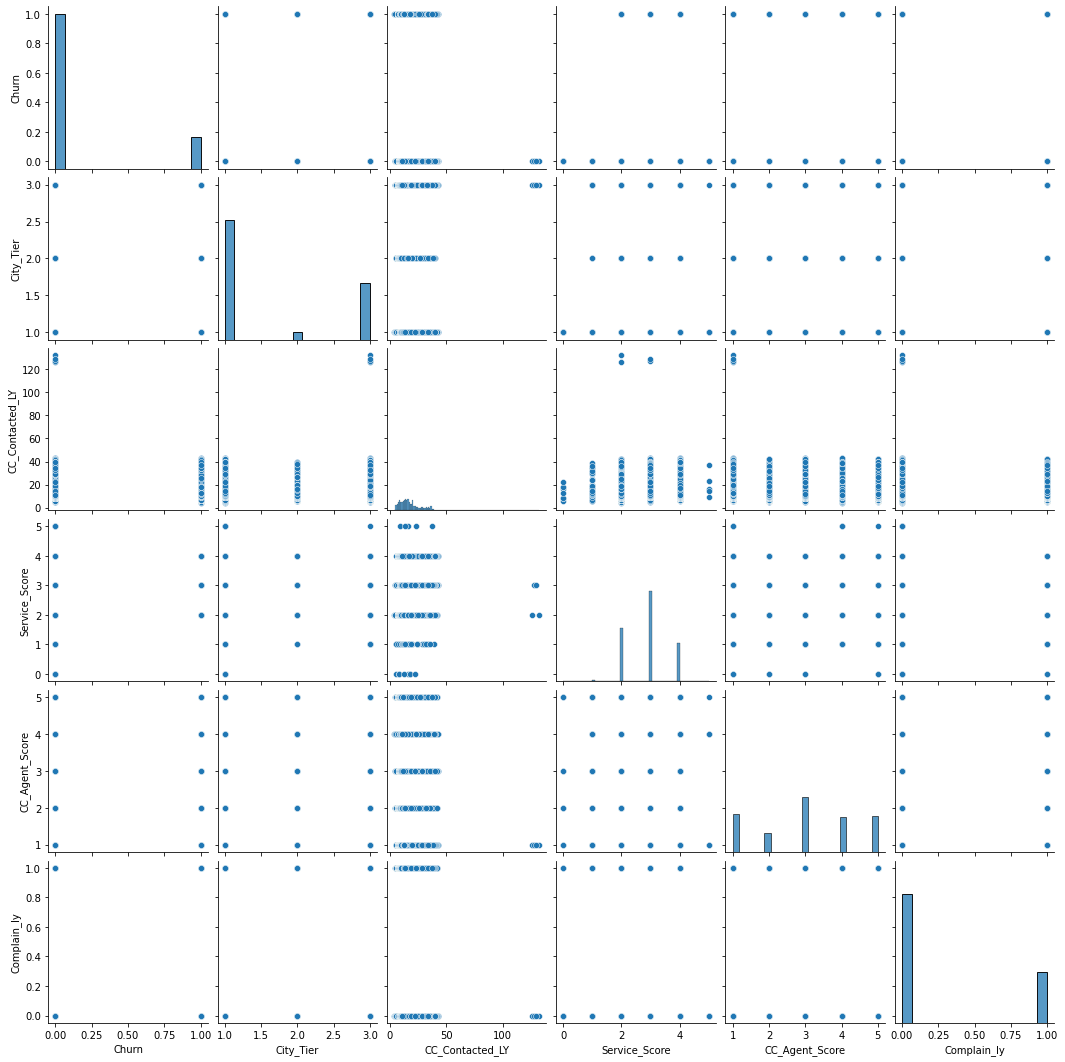

In [577]:
#the pair plot:-
sns.pairplot(data = churn)
plt.show()

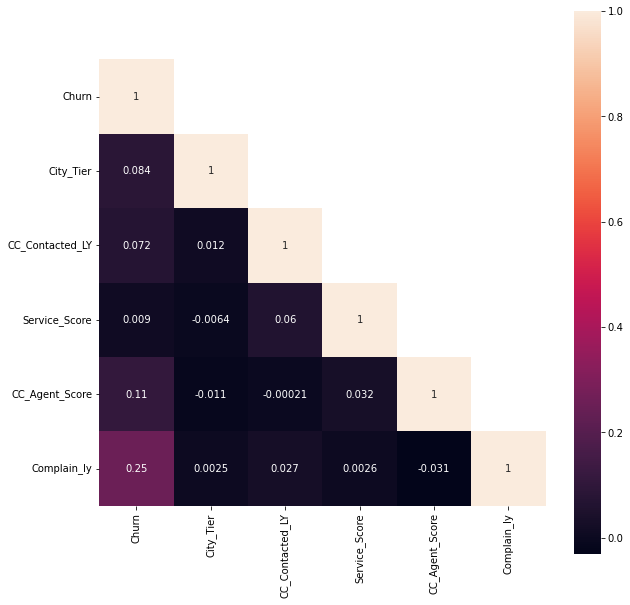

In [714]:
# plotting heatmap of correlation
cor = churn.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask, vmax=1, square=True, annot=True)
plt.show()


In [715]:
# lets check the percentage of outlier in each column
Q1 = churn.quantile(0.25)
Q3 = churn.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((churn < (Q1 - 1.5 * IQR)) | (churn > (Q3 + 1.5 * IQR))).sum()/churn.shape[0]*100),
            columns = ['outlier %'], index = None). round(2)

,outlier %
Account_user_count,0.00
CC_Agent_Score,0.00
CC_Contacted_LY,0.37
Churn,16.84
City_Tier,0.00
Complain_ly,0.00
Day_Since_CC_connect,0.00
Gender,0.00
Login_device,0.00
Marital_Status,0.00


## CLEANING THE MESSY DATA

## Treating the variable "Tenure"

In [716]:
churn['Tenure'] = churn['Tenure'].replace('#',np.NaN)

In [720]:
churn['Tenure'] = churn['Tenure'].astype('Int64')

In [721]:
churn['Tenure'].unique()

<IntegerArray>
[   4,    0,    2,   13,   11, <NA>,    9,   99,   19,   20,   14,    8,   26,
   18,    5,   30,    7,    1,   23,    3,   29,    6,   28,   24,   25,   16,
   10,   15,   22,   27,   12,   21,   17,   50,   60,   31,   51,   61]
Length: 38, dtype: Int64

In [583]:
## Treating the variable CC_Contacted_LY

In [723]:
churn["CC_Contacted_LY"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [724]:
churn["CC_Contacted_LY"].value_counts()

14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
28.0     178
34.0     178
30.0     175
27.0     174
26.0     169
35.0     165
31.0     165
33.0     155
36.0     148
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
43.0       8
5.0        8
127.0      1
126.0      1
132.0      1
4.0        1
129.0      1
Name: CC_Contacted_LY, dtype: int64

## Treating the variable "Account_user_count"

In [725]:
churn["Account_user_count"].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [726]:
churn["Account_user_count"].value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [727]:
churn['Account_user_count'] = churn['Account_user_count'].replace('@',np.NaN)

In [728]:
churn["Account_user_count"].unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

In [729]:
churn['Account_user_count'] = churn['Account_user_count'].astype('float64')

## Treating the variable 'rev_per_month'

In [730]:
churn["rev_per_month"].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [731]:
churn['rev_per_month'] = churn['rev_per_month'].replace('+',np.NaN)

In [732]:
churn['rev_per_month'] = churn['rev_per_month'].astype('float64')

In [733]:
churn["rev_per_month"].unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

## Treating the variable 'rev_growth_yoy'

In [734]:
churn["rev_growth_yoy"].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [735]:
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].replace('$',np.NaN)

In [736]:
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].astype('float64')

## Treating the variable 'Day_Since_CC_connect'

In [737]:
churn.Day_Since_CC_connect.unique() 

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [738]:
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].replace('$',np.NaN)

In [739]:
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].astype('float64')

In [740]:
churn.Day_Since_CC_connect.unique() 

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

## Treating the variable "cashback"

In [741]:
churn["cashback"].unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [742]:
churn['cashback'] = churn['cashback'].replace('$',np.NaN)

In [743]:
churn['cashback'] = churn['cashback'].astype('float64')

In [744]:
churn["cashback"].unique()

array([159.93, 120.9 ,    nan, ..., 227.36, 226.91, 191.42])

## Treating the variable "coupon_used_for_payment"

In [745]:
churn["coupon_used_for_payment"].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [747]:
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('#',np.NaN)
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('$',np.NaN)
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('*',np.NaN)

In [748]:
churn['City_Tier'] = churn['City_Tier'].astype('Int64')

In [749]:
churn["coupon_used_for_payment"].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

## Treating the variable "City_Tier"

In [750]:
churn["City_Tier"].unique()

<IntegerArray>
[3, 1, <NA>, 2]
Length: 4, dtype: Int64

In [751]:
churn['City_Tier'] = churn['City_Tier'].fillna(churn['City_Tier'].mode()[0])

In [752]:
churn["City_Tier"].unique()

<IntegerArray>
[3, 1, 2]
Length: 3, dtype: Int64

In [753]:
churn['City_Tier'] = churn['City_Tier'].astype('Int64')

## Treating the variable "CC_Contacted_LY"

In [754]:
churn["CC_Contacted_LY"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [755]:
churn["CC_Contacted_LY"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [756]:
churn['CC_Contacted_LY'] = churn['CC_Contacted_LY'].astype('Int64')

## Treating the variable "Payment"

In [757]:
churn["Payment"].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [758]:
churn['Payment'] = churn['Payment'].fillna(churn['Payment'].mode()[0])

In [761]:
churn['Payment'] = churn['Payment'].replace('Debit Card','1')
churn['Payment'] = churn['Payment'].replace('UPI','2')
churn['Payment'] = churn['Payment'].replace('Credit Card','3')
churn['Payment'] = churn['Payment'].replace('Cash on Delivery','4')
churn['Payment'] = churn['Payment'].replace('E wallet','5')

In [762]:
churn['Payment'] = churn['Payment'].astype('Int64')

In [763]:
churn["Payment"].unique()

<IntegerArray>
[1, 2, 3, 4, 5]
Length: 5, dtype: Int64

## Treating the variable "Gender"

In [764]:
churn["Gender"].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [765]:
churn['Gender'] = churn['Gender'].replace('Female','1')
churn['Gender'] = churn['Gender'].replace('F','1')
churn['Gender'] = churn['Gender'].replace('Male','2')
churn['Gender'] = churn['Gender'].replace('M','2')

In [766]:
churn['Gender'] = churn['Gender'].fillna(churn['Gender'].mode()[0])

In [767]:
churn['Gender'] = churn['Gender'].astype('int64')

In [768]:
churn["Gender"].unique()

array([1, 2], dtype=int64)

## Treating the variable "Service_Score"

In [769]:
churn["Service_Score"].unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [770]:
churn['Service_Score'] = churn['Service_Score'].fillna(churn['Service_Score'].mode()[0])

In [771]:
churn["Service_Score"].unique()

array([3., 2., 1., 0., 4., 5.])

In [772]:
churn['Service_Score'] = churn['Service_Score'].astype('int64')

In [773]:
churn["Service_Score"].unique()

array([3, 2, 1, 0, 4, 5], dtype=int64)

## Treating the variable "account_segment"

In [774]:
churn["account_segment"].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [775]:
churn['account_segment'] = churn['account_segment'].replace('HNI','1')
churn['account_segment'] = churn['account_segment'].replace('Super Plus','2')
churn['account_segment'] = churn['account_segment'].replace('Super +','2')
churn['account_segment'] = churn['account_segment'].replace('Super','3')
churn['account_segment'] = churn['account_segment'].replace('Regular Plus','4')
churn['account_segment'] = churn['account_segment'].replace('Regular +','4')
churn['account_segment'] = churn['account_segment'].replace('Regular','5')



In [776]:
churn["account_segment"].unique()

array(['3', '4', '5', '1', nan, '2'], dtype=object)

In [777]:
churn['account_segment'] = churn['account_segment'].fillna(churn['account_segment'].mode()[0])

In [778]:
churn['account_segment'] = churn['account_segment'].astype('int64')

In [779]:
churn["account_segment"].unique()

array([3, 4, 5, 1, 2], dtype=int64)

## Treating the variable "CC_Agent_Score"

In [780]:
churn["CC_Agent_Score"].unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [781]:
churn['CC_Agent_Score'] = churn['CC_Agent_Score'].fillna(churn['CC_Agent_Score'].mode()[0])

In [782]:
churn["CC_Agent_Score"].unique()

array([2., 3., 5., 4., 1.])

In [783]:
churn['CC_Agent_Score'] = churn['CC_Agent_Score'].astype('int64')

In [784]:
churn["CC_Agent_Score"].unique()

array([2, 3, 5, 4, 1], dtype=int64)

## Treating the variable "Marital_Status"

In [785]:
churn["Marital_Status"].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [786]:
churn['Marital_Status'] = churn['Marital_Status'].fillna(churn['Marital_Status'].mode()[0])

In [787]:
churn['Marital_Status'] = churn['Marital_Status'].replace('Single','1')
churn['Marital_Status'] = churn['Marital_Status'].replace('Divorced','3')
churn['Marital_Status'] = churn['Marital_Status'].replace('Married','2')

In [788]:
churn['Marital_Status'] = churn['Marital_Status'].astype('int64')

In [789]:
churn["Marital_Status"].unique()

array([1, 3, 2], dtype=int64)

## Treating the variable "Complain_ly"

In [790]:
churn["Complain_ly"].unique()

array([ 1.,  0., nan])

In [791]:
churn['Complain_ly'] = churn['Complain_ly'].fillna(churn['Complain_ly'].mode()[0])

In [792]:
churn['Complain_ly'] = churn['Complain_ly'].astype('int64')

In [793]:
churn["Complain_ly"].unique()

array([1, 0], dtype=int64)

## Treating the variable "Login_device"

In [794]:
churn["Login_device"].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [795]:
churn['Login_device'] = churn['Login_device'].replace('&&&&',np.NaN)

In [796]:
churn['Login_device'] = churn['Login_device'].fillna(churn['Login_device'].mode()[0])

In [797]:
churn['Login_device'] = churn['Login_device'].replace('Mobile','1')
churn['Login_device'] = churn['Login_device'].replace('Computer','2')

In [798]:
churn['Login_device'] = churn['Login_device'].astype('int64')

In [799]:
churn["Login_device"].unique()

array([1, 2], dtype=int64)

## Information of clean data

## Impute Missing Values

In [800]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
churn_df_imputed= pd.DataFrame(imputer.fit_transform(churn), columns =churn.columns)


In [801]:
churn_df_imputed

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1.0,4.0,3.0,6.0,1.0,1.0,3.0,3.0,3.0,2.0,1.0,9.0,1.0,11.0,1.0,5.0,159.930,1.0
1,1.0,0.0,1.0,8.0,2.0,2.0,3.0,4.0,4.0,3.0,1.0,7.0,1.0,15.0,0.0,0.0,120.900,1.0
2,1.0,0.0,1.0,30.0,1.0,2.0,2.0,4.0,4.0,3.0,1.0,6.0,1.0,14.0,0.0,3.0,148.523,1.0
3,1.0,0.0,3.0,15.0,1.0,2.0,2.0,4.0,3.0,5.0,1.0,8.0,0.0,23.0,0.0,3.0,134.070,1.0
4,1.0,0.0,1.0,12.0,3.0,2.0,2.0,3.0,4.0,5.0,1.0,3.0,0.0,11.0,1.0,3.0,129.600,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,0.0,10.0,1.0,34.0,3.0,2.0,3.0,2.0,3.0,1.0,2.0,9.0,0.0,19.0,1.0,4.0,153.710,2.0
11256,0.0,13.0,1.0,19.0,3.0,2.0,3.0,5.0,1.0,5.0,2.0,7.0,0.0,16.0,1.0,8.0,226.910,1.0
11257,0.0,1.0,1.0,14.0,1.0,2.0,3.0,2.0,3.0,4.0,2.0,7.0,1.0,22.0,1.0,4.0,191.420,1.0
11258,0.0,23.0,3.0,11.0,3.0,2.0,4.0,5.0,3.0,4.0,2.0,7.0,0.0,16.0,2.0,9.0,179.900,2.0


In [802]:
churn_df_imputed.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [804]:
churn_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  float64
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  float64
 5   Gender                   11260 non-null  float64
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  float64
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  float64
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

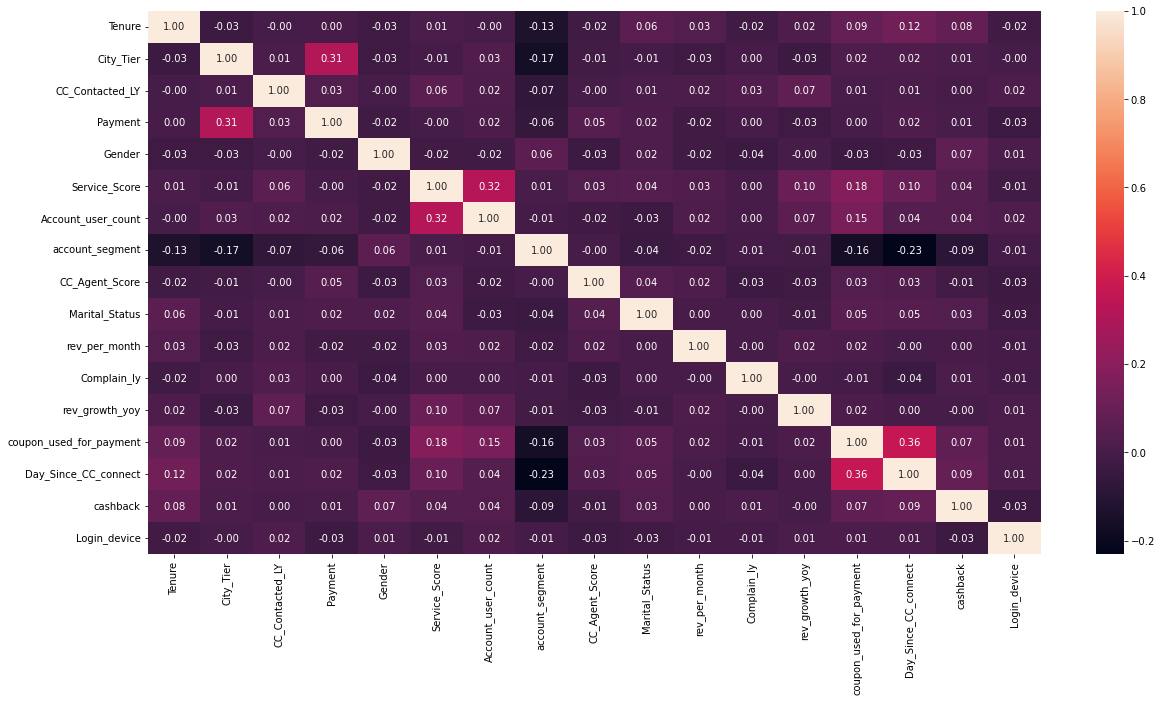

In [803]:


plt.figure(figsize=(20,10))
sns.heatmap(churn_df_imputed.drop('Churn', axis = 1).corr(), annot=True, fmt='.2f')
plt.show()


## Percentage of outlier

In [805]:
# lets check the percentage of outlier in each column
Q1 = churn_df_imputed.quantile(0.25)
Q3 = churn_df_imputed.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((churn_df_imputed < (Q1 - 1.5 * IQR)) | (churn_df_imputed > (Q3 + 1.5 * IQR))).sum()/churn_df_imputed.shape[0]*100),
            columns = ['outlier %'], index = None). round(2)

,outlier %
Churn,16.84
Tenure,1.23
City_Tier,0.00
CC_Contacted_LY,0.37
Payment,0.00
Gender,0.00
Service_Score,0.12
Account_user_count,6.76
account_segment,14.56
CC_Agent_Score,0.00


In [806]:
# checking info of data
churn_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  float64
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  float64
 5   Gender                   11260 non-null  float64
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  float64
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  float64
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

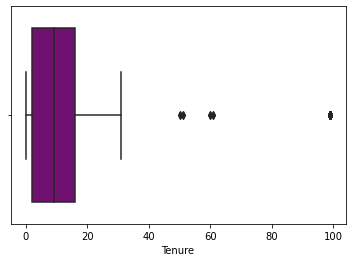

In [816]:
sns.boxplot(churn_df_imputed['Tenure'], color= "purple")
plt.show()


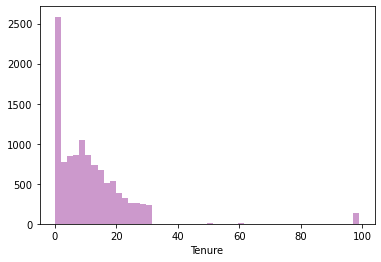

In [817]:
sns.distplot(churn_df_imputed['Tenure'], kde=False, color='purple');
plt.show()

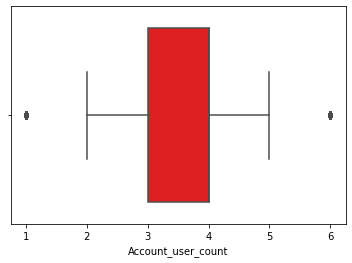

In [809]:
sns.boxplot(churn_df_imputed['Account_user_count'], color= "red")
plt.show()

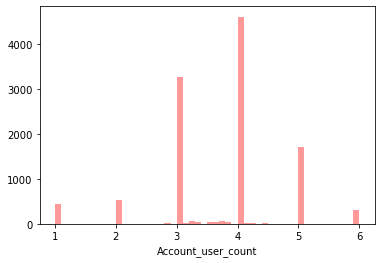

In [810]:
sns.distplot(churn_df_imputed['Account_user_count'], kde=False, color='red');
plt.show()

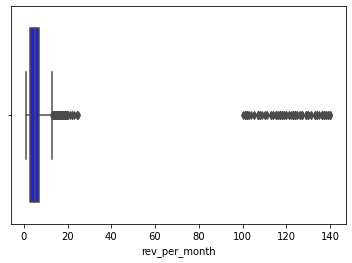

In [818]:
sns.boxplot(churn_df_imputed['rev_per_month'], color= "blue")
plt.show()

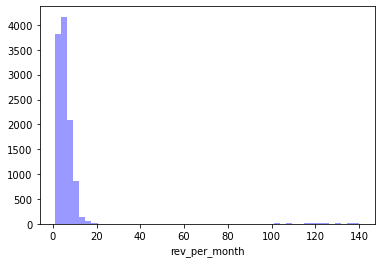

In [819]:
sns.distplot(churn_df_imputed['rev_per_month'], kde=False, color='blue');
plt.show()

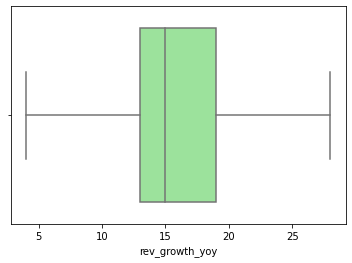

In [820]:
sns.boxplot(churn_df_imputed['rev_growth_yoy'], color= "lightgreen")
plt.show()

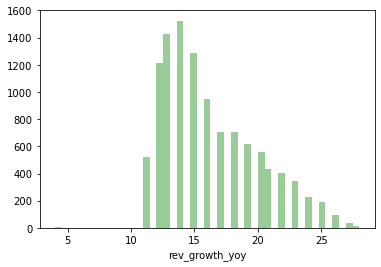

In [821]:
sns.distplot(churn_df_imputed['rev_growth_yoy'], kde=False, color='g');
plt.show()

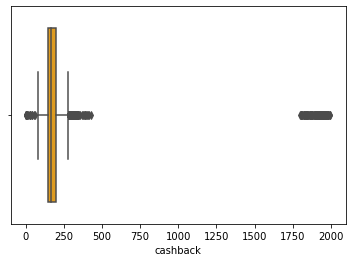

In [822]:
sns.boxplot(churn_df_imputed['cashback'], color= "orange")
plt.show()

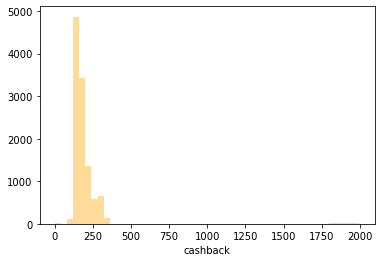

In [823]:
sns.distplot(churn_df_imputed['cashback'], kde=False, color='orange');
plt.show()

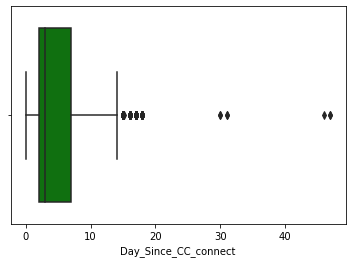

In [824]:
sns.boxplot(churn_df_imputed['Day_Since_CC_connect'], color= "green")
plt.show()


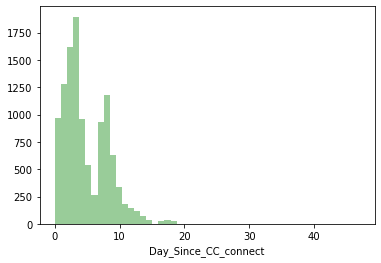

In [825]:
sns.distplot(churn_df_imputed['Day_Since_CC_connect'], kde=False, color='green');
plt.show()

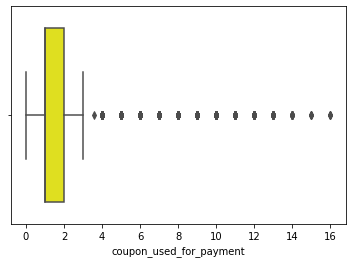

In [826]:
sns.boxplot(churn_df_imputed['coupon_used_for_payment'], color= "yellow")
plt.show()


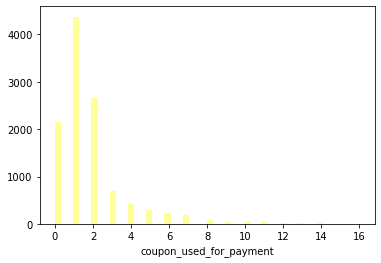

In [828]:
sns.distplot(churn_df_imputed['coupon_used_for_payment'], kde=False, color='yellow');
plt.show()

## Treatment of Outlier

In [829]:
#treating outlier
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [830]:
lw,up=remove_outlier(churn_df_imputed['Tenure'])
churn_df_imputed['Tenure']=np.where(churn_df_imputed['Tenure']>up,up,churn_df_imputed['Tenure'])
churn_df_imputed['Tenure']=np.where(churn_df_imputed['Tenure']<lw,lw,churn_df_imputed['Tenure'])

lw,up=remove_outlier(churn_df_imputed['CC_Contacted_LY'])
churn_df_imputed['CC_Contacted_LY']=np.where(churn_df_imputed['CC_Contacted_LY']>up,up,churn_df_imputed['CC_Contacted_LY'])
churn_df_imputed['CC_Contacted_LY']=np.where(churn_df_imputed['CC_Contacted_LY']<lw,lw,churn_df_imputed['CC_Contacted_LY'])

lw,up=remove_outlier(churn_df_imputed['Account_user_count'])
churn_df_imputed['Account_user_count']=np.where(churn_df_imputed['Account_user_count']>up,up,churn_df_imputed['Account_user_count'])
churn_df_imputed['Account_user_count']=np.where(churn_df_imputed['Account_user_count']<lw,lw,churn_df_imputed['Account_user_count'])

lw,up=remove_outlier(churn_df_imputed['cashback'])
churn_df_imputed['cashback']=np.where(churn_df_imputed['cashback']>up,up,churn_df_imputed['cashback'])
churn_df_imputed['cashback']=np.where(churn_df_imputed['cashback']<lw,lw,churn_df_imputed['cashback'])

lw,up=remove_outlier(churn_df_imputed['rev_per_month'])
churn_df_imputed['rev_per_month']=np.where(churn_df_imputed['rev_per_month']>up,up,churn_df_imputed['rev_per_month'])
churn_df_imputed['rev_per_month']=np.where(churn_df_imputed['rev_per_month']<lw,lw,churn_df_imputed['rev_per_month'])

lw,up=remove_outlier(churn['Day_Since_CC_connect'])
churn_df_imputed['Day_Since_CC_connect']=np.where(churn_df_imputed['Day_Since_CC_connect']>up,up,churn_df_imputed['Day_Since_CC_connect'])
churn_df_imputed['Day_Since_CC_connect']=np.where(churn_df_imputed['Day_Since_CC_connect']<lw,lw,churn_df_imputed['Day_Since_CC_connect'])

lw,up=remove_outlier(churn['coupon_used_for_payment'])
churn_df_imputed['coupon_used_for_payment']=np.where(churn_df_imputed['coupon_used_for_payment']>up,up,churn_df_imputed['coupon_used_for_payment'])
churn_df_imputed['coupon_used_for_payment']=np.where(churn_df_imputed['coupon_used_for_payment']<lw,lw,churn_df_imputed['coupon_used_for_payment'])

lw,up=remove_outlier(churn['rev_growth_yoy'])
churn_df_imputed['rev_growth_yoy']=np.where(churn_df_imputed['rev_growth_yoy']>up,up,churn_df_imputed['rev_growth_yoy'])
churn_df_imputed['rev_growth_yoy']=np.where(churn_df_imputed['rev_growth_yoy']<lw,lw,churn_df_imputed['rev_growth_yoy'])

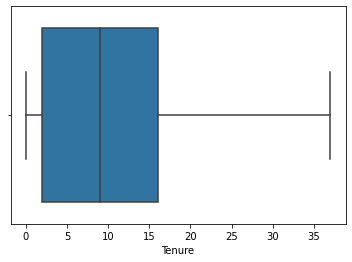

In [831]:
sns.boxplot(churn_df_imputed['Tenure'])
plt.show()

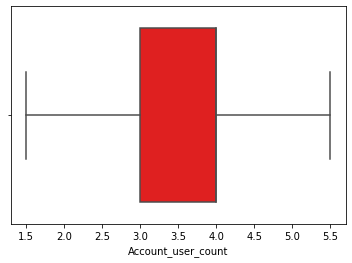

In [832]:
sns.boxplot(churn_df_imputed['Account_user_count'], color= "red")
plt.show()

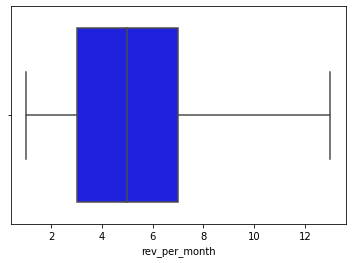

In [833]:
sns.boxplot(churn_df_imputed['rev_per_month'], color= "blue")
plt.show()

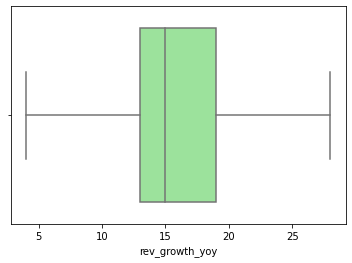

In [834]:
sns.boxplot(churn_df_imputed['rev_growth_yoy'], color= "lightgreen")
plt.show()

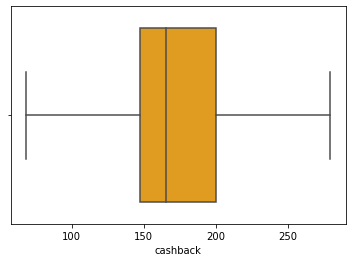

In [835]:
sns.boxplot(churn_df_imputed['cashback'], color= "orange")
plt.show()

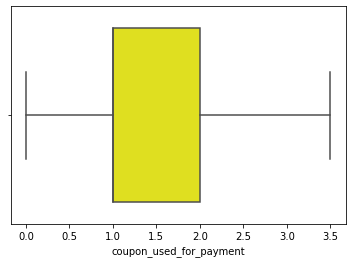

In [836]:
sns.boxplot(churn_df_imputed['coupon_used_for_payment'], color= "yellow")
plt.show()


<AxesSubplot:>

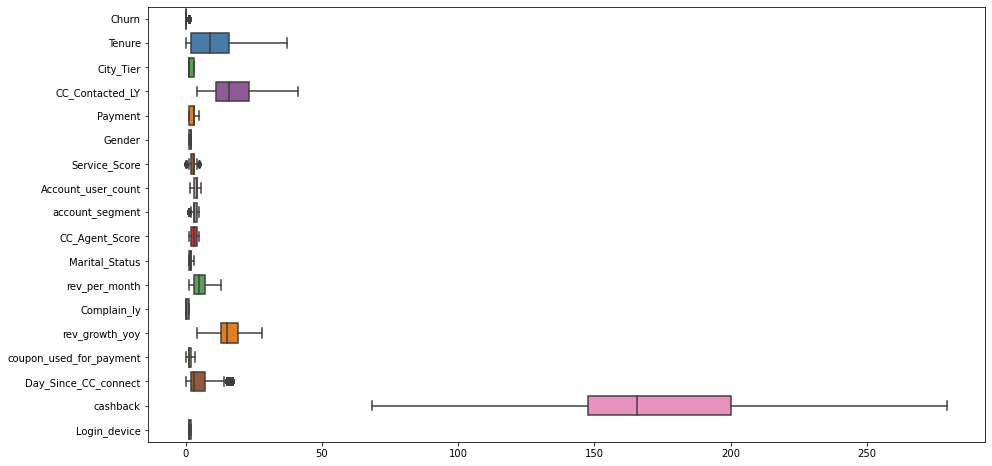

In [837]:
plt.figure(figsize=(15,8))
sns.boxplot(data=churn_df_imputed, orient="h", palette="Set1")

## Bivariate Analysis

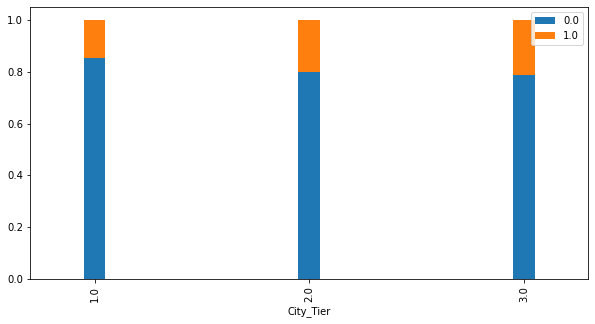

In [838]:

df= churn_df_imputed.groupby('City_Tier')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(10,5), width=0.1)
plt.legend(loc='upper right');


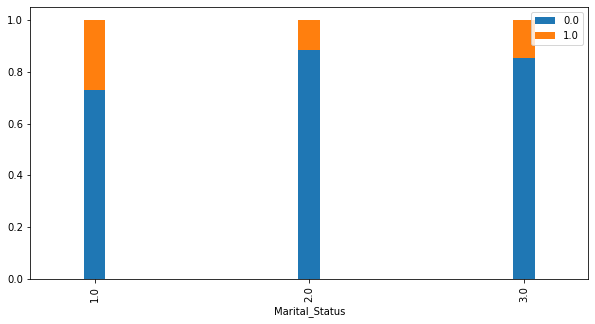

In [839]:
df= churn_df_imputed.groupby('Marital_Status')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(10,5), width=0.1)
plt.legend(loc='upper right');

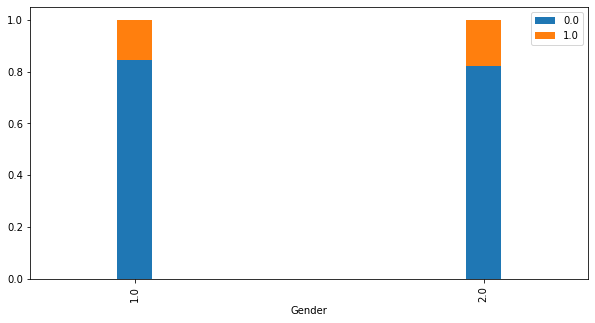

In [840]:
df= churn_df_imputed.groupby('Gender')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(10,5), width=0.1)
plt.legend(loc='upper right');

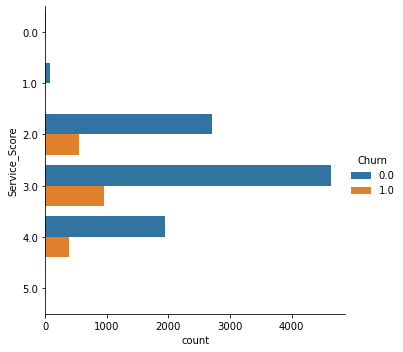

In [841]:
sns.catplot(y="Service_Score", hue="Churn", kind="count", data=churn_df_imputed)

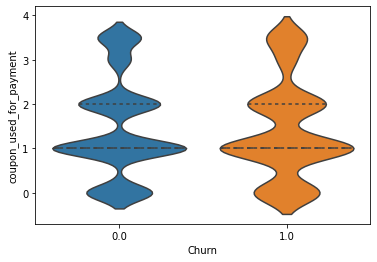

In [842]:
sns.violinplot(churn_df_imputed['Churn'],churn_df_imputed['coupon_used_for_payment'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

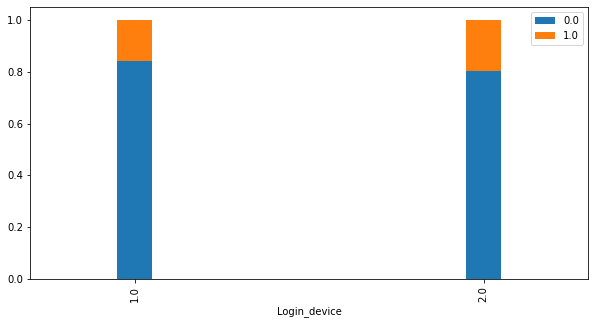

In [843]:
df= churn_df_imputed.groupby('Login_device')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(10,5), width=0.1)
plt.legend(loc='upper right');

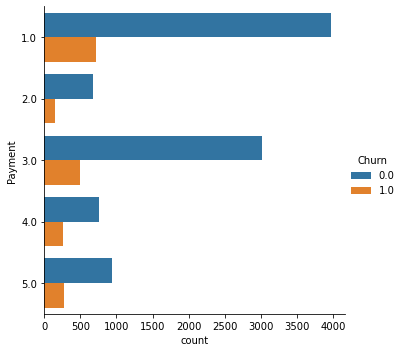

In [844]:
sns.catplot(y="Payment", hue="Churn", kind="count", data=churn_df_imputed)

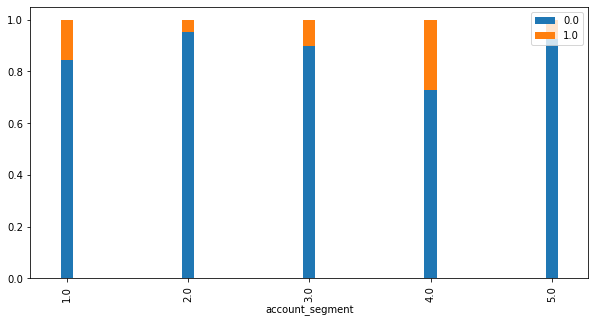

In [845]:
df= churn_df_imputed.groupby('account_segment')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(10,5), width=0.1)
plt.legend(loc='upper right');


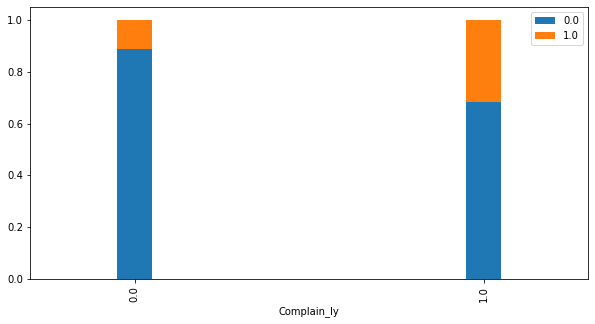

In [846]:
df= churn_df_imputed.groupby('Complain_ly')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(10,5), width=0.1)
plt.legend(loc='upper right');


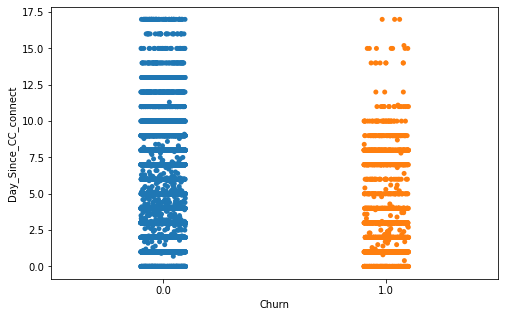

In [847]:
plt.figure(figsize=(8,5))
sns.stripplot(churn_df_imputed["Churn"], churn_df_imputed['Day_Since_CC_connect'], jitter=True) 
plt.show()


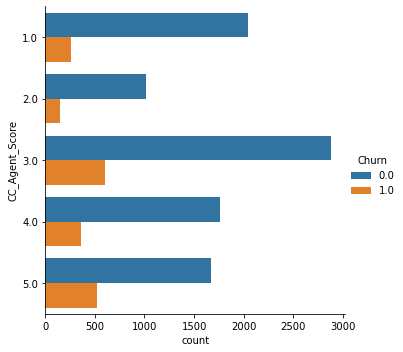

In [848]:
sns.catplot(y="CC_Agent_Score", hue="Churn", kind="count", data=churn_df_imputed)

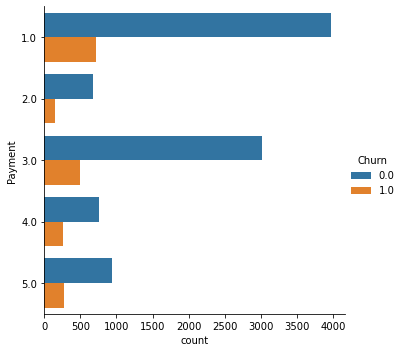

In [922]:
sns.catplot(y="Payment", hue="Churn", kind="count", data=churn_df_imputed)

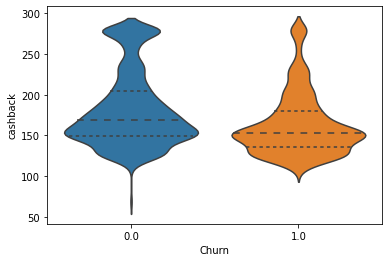

In [849]:
sns.violinplot(churn_df_imputed['Churn'],churn_df_imputed['cashback'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

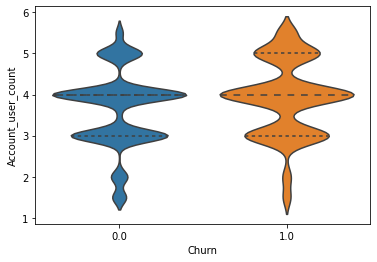

In [850]:

sns.violinplot(churn_df_imputed['Churn'],churn_df_imputed['Account_user_count'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

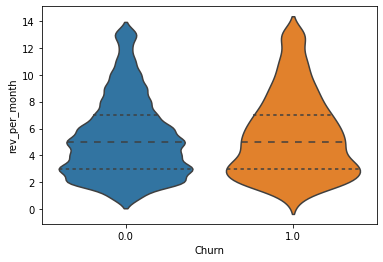

In [851]:
sns.violinplot(churn_df_imputed['Churn'],churn_df_imputed['rev_per_month'],inner='quartile',scale='width',orient='vertical',scale_hue=True);


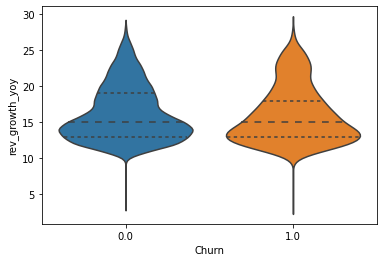

In [852]:
sns.violinplot(churn_df_imputed['Churn'],churn_df_imputed['rev_growth_yoy'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

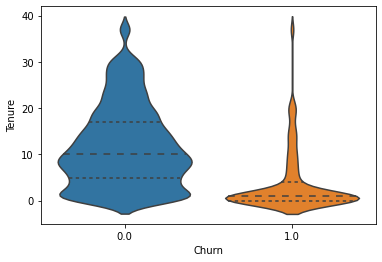

In [853]:
sns.violinplot(churn_df_imputed['Churn'],churn_df_imputed['Tenure'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

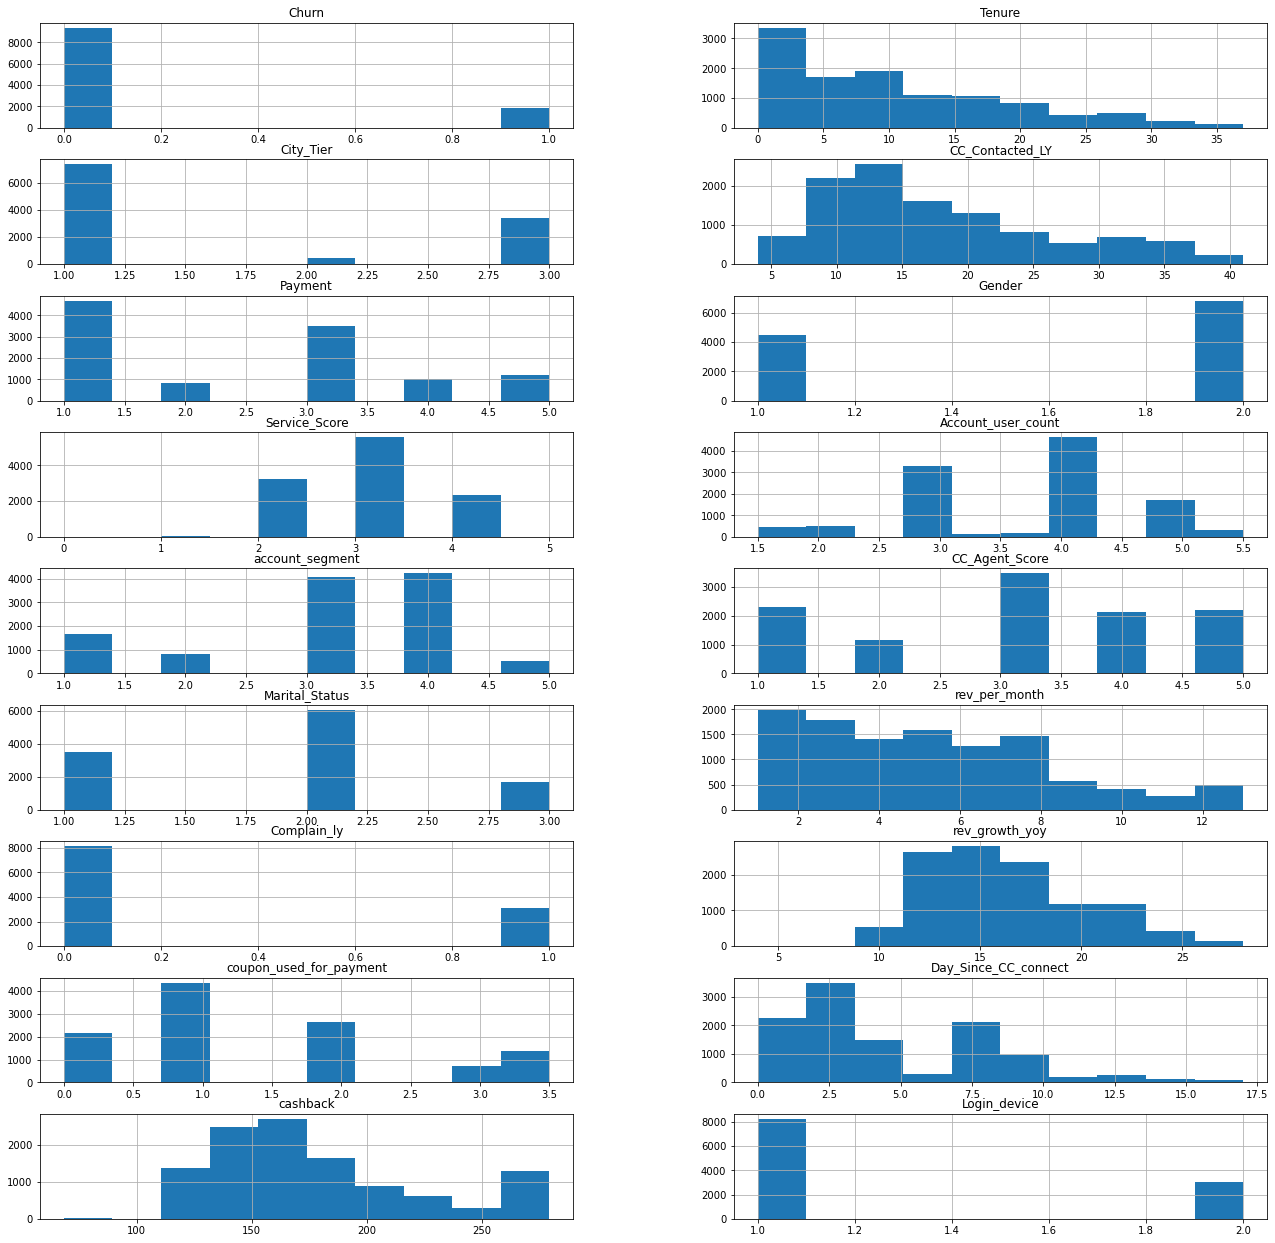

In [854]:
churn_df_imputed.hist(figsize=(22,22),layout=(9,2));

In [855]:

churn_df_imputed.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1.0,4.0,3.0,6.0,1.0,1.0,3.0,3.0,3.0,2.0,1.0,9.0,1.0,11.0,1.0,5.0,159.930,1.0
1,1.0,0.0,1.0,8.0,2.0,2.0,3.0,4.0,4.0,3.0,1.0,7.0,1.0,15.0,0.0,0.0,120.900,1.0
2,1.0,0.0,1.0,30.0,1.0,2.0,2.0,4.0,4.0,3.0,1.0,6.0,1.0,14.0,0.0,3.0,148.523,1.0
3,1.0,0.0,3.0,15.0,1.0,2.0,2.0,4.0,3.0,5.0,1.0,8.0,0.0,23.0,0.0,3.0,134.070,1.0
4,1.0,0.0,1.0,12.0,3.0,2.0,2.0,3.0,4.0,5.0,1.0,3.0,0.0,11.0,1.0,3.0,129.600,1.0


<Figure size 1584x1584 with 0 Axes>

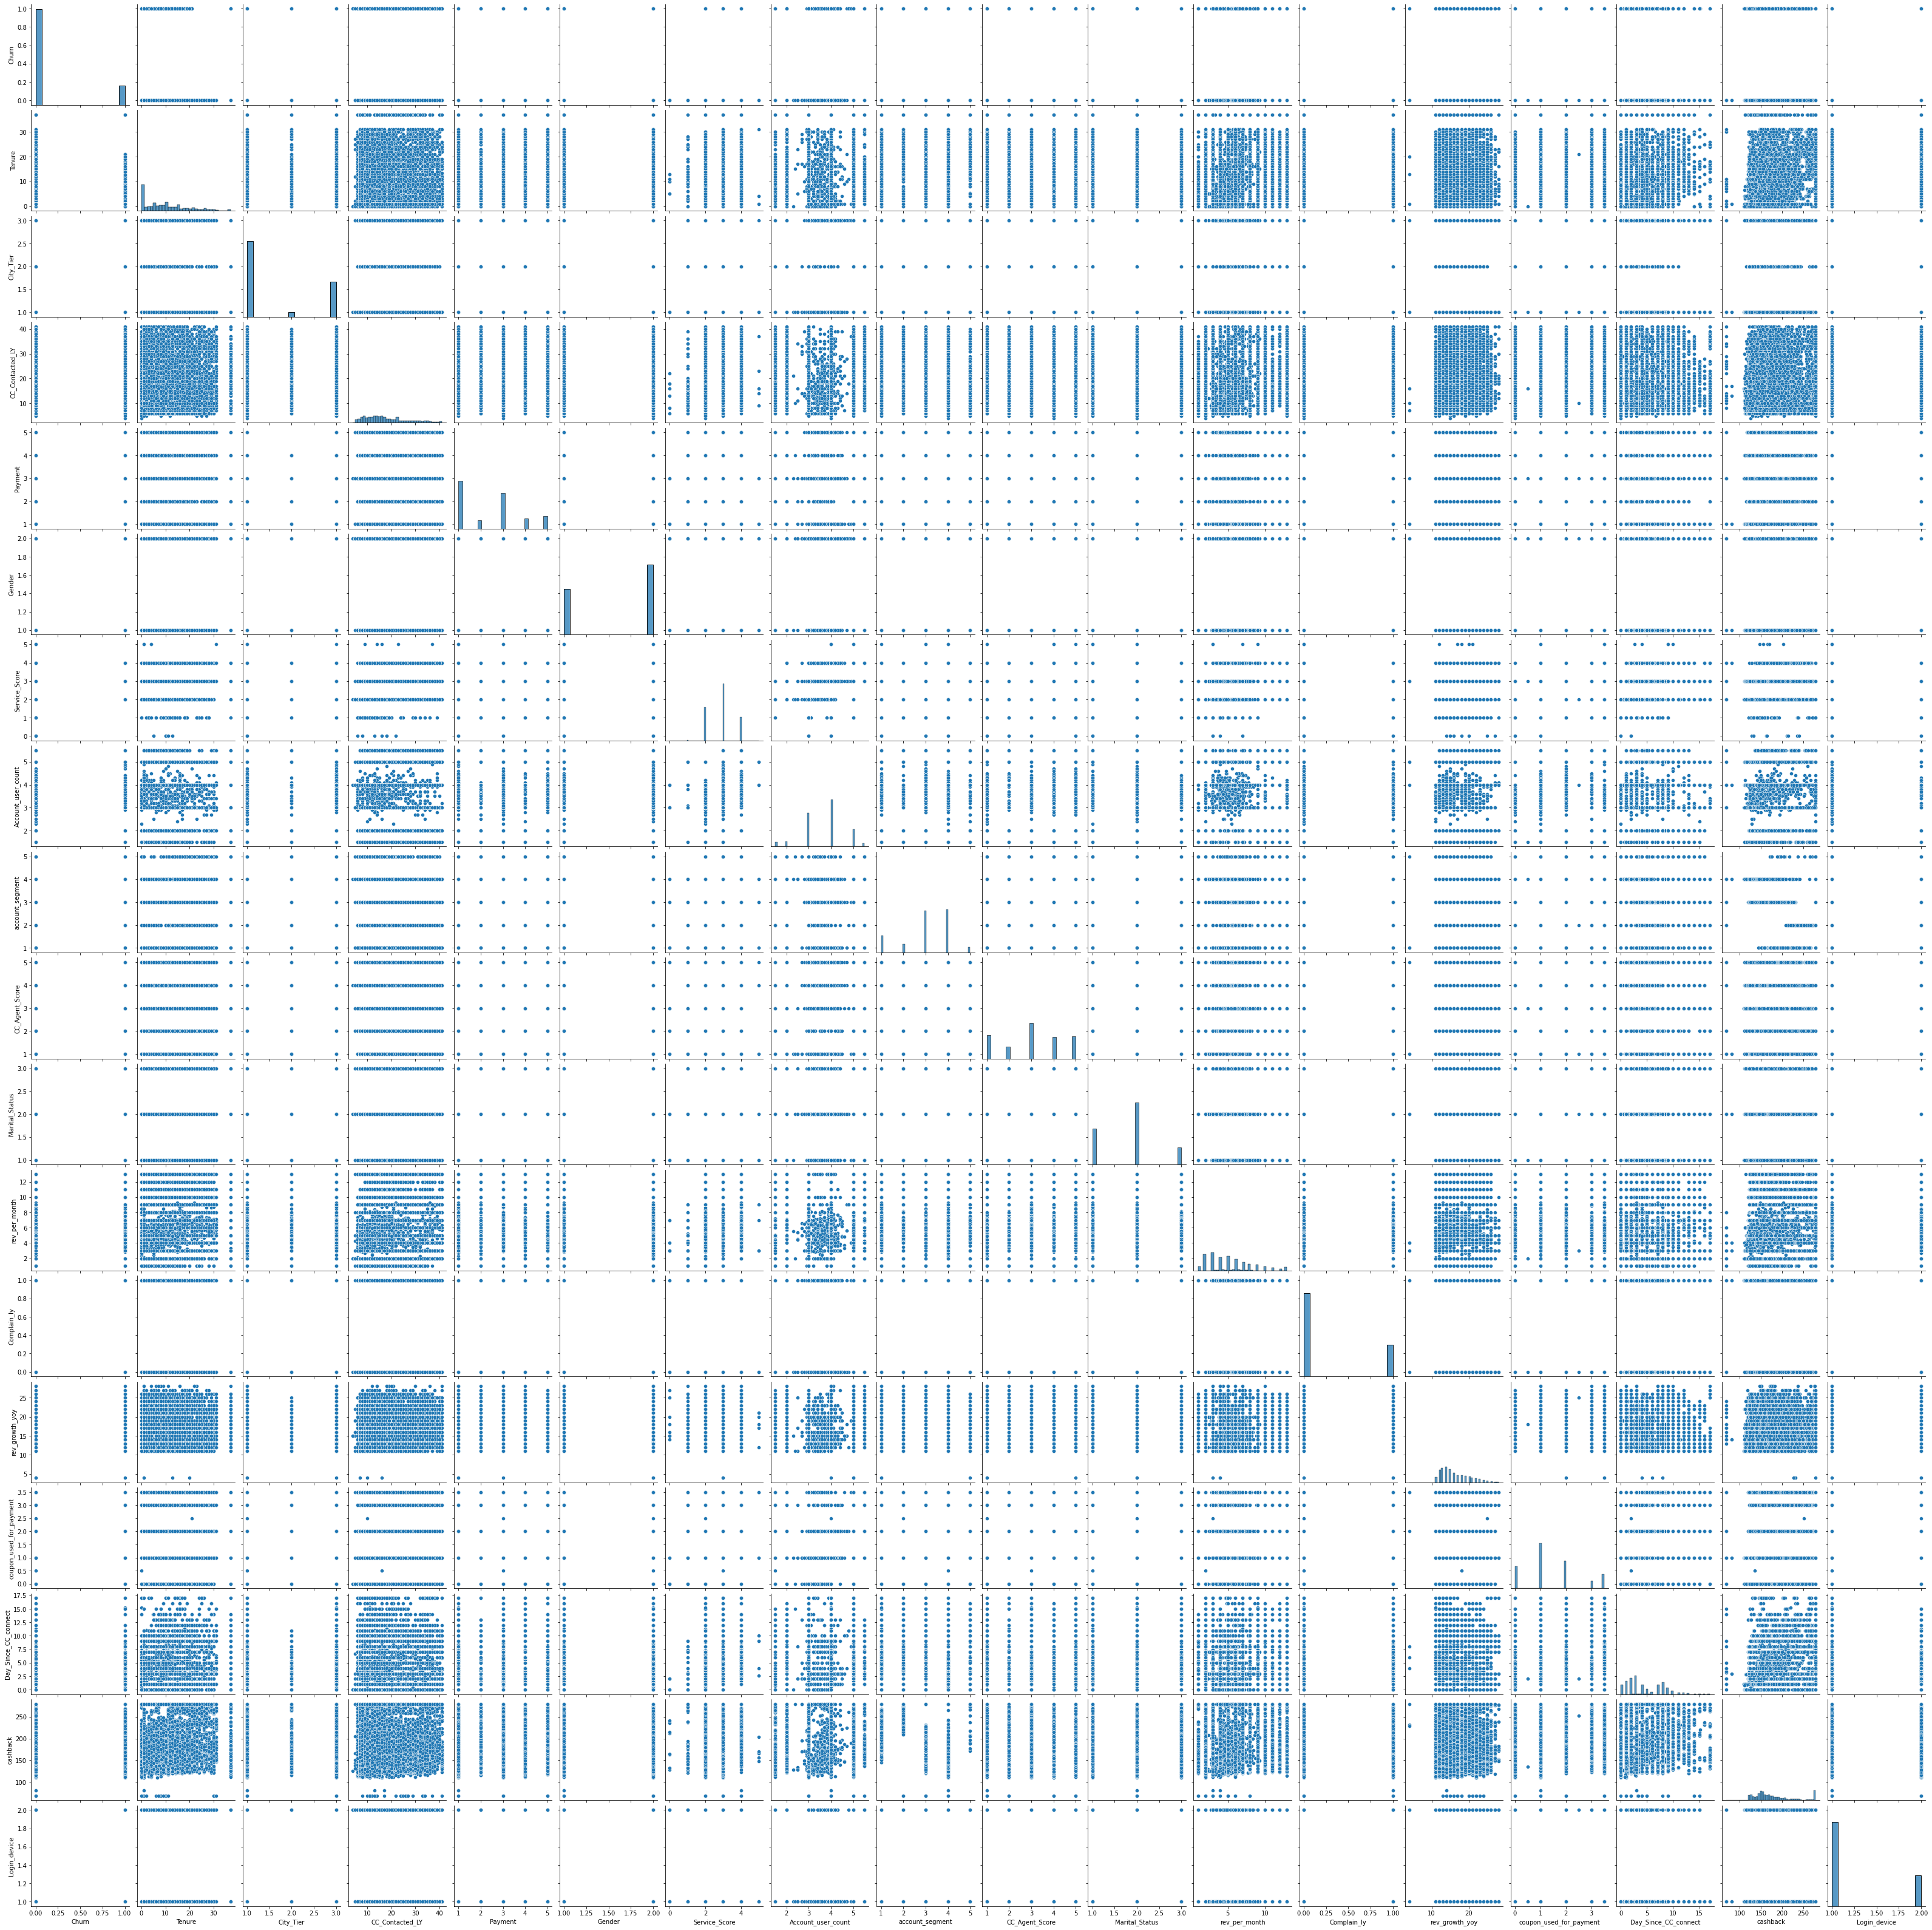

In [856]:
plt.figure(figsize=(22,22))
sns.pairplot(churn_df_imputed)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
corr=churn_df_imputed.corr()
sns.heatmap(corr, annot=True)
plt.show()

# SCALING OF DATA

In [857]:
# for scaling we can use standard scaler
from sklearn.preprocessing import StandardScaler

In [858]:
X = StandardScaler()

In [859]:
scaled_df = X.fit_transform(churn_df_imputed)

In [860]:
scaled_df

array([[ 2.22234528, -0.70226377,  1.48191371, ...,  0.10989532,
        -0.41096782, -0.60512252],
       [ 2.22234528, -1.15134502, -0.70933361, ..., -1.29393617,
        -1.26289338, -0.60512252],
       [ 2.22234528, -1.15134502, -0.70933361, ..., -0.45163727,
        -0.6599536 , -0.60512252],
       ...,
       [-0.44997508, -1.03907471, -0.70933361, ..., -0.17087098,
         0.27637873, -0.60512252],
       [-0.44997508,  1.43087218,  1.48191371, ...,  1.23296051,
         0.02492645,  1.65255791],
       [-0.44997508, -0.25318252, -0.70933361, ..., -0.45163727,
        -0.08115498, -0.60512252]])

In [861]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [862]:
wss =[]
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [863]:
wss

[202680.0,
 184947.11191832833,
 173712.57218082604,
 166737.2005470279,
 161007.46977224515,
 156758.7656283221,
 153313.10457892207,
 150573.43553702015,
 147228.83576433366,
 145173.72425008012]

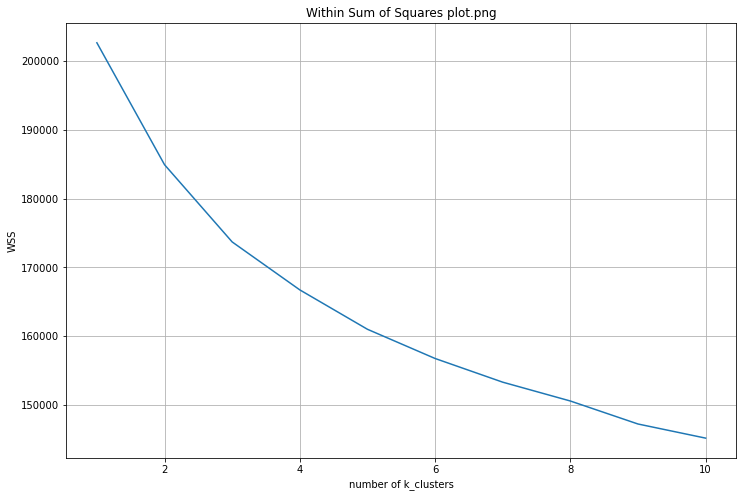

In [864]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11), wss)
plt.title('Within Sum of Squares plot.png')
plt.grid()
plt.savefig('q1_Within Sum of Squares plot.jpg')
plt.ylabel('WSS')
plt.xlabel('number of k_clusters')
plt.show()

## K-means with K= 2

In [893]:
k_means = KMeans(n_clusters =2)
k_means.fit(scaled_df)
labels2 = k_means.labels_

In [894]:
labels2

array([1, 1, 1, ..., 1, 0, 1])

In [895]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [896]:
silhouette_score(scaled_df,labels2)

0.09006037760645258

## K-means with  K= 3

In [897]:
k_means = KMeans(n_clusters =3)
k_means.fit(scaled_df)
labels3 = k_means.labels_

In [898]:
silhouette_score(scaled_df,labels3)

0.08932302929990461

## K-means with K= 4

In [900]:
k_means = KMeans(n_clusters =4)
k_means.fit(scaled_df)
labels4 = k_means.labels_

In [901]:
silhouette_score(scaled_df,labels4)

0.06400873238493425

In [ ]:
## K=2 and 3 are giving 0.9 scores approximately

In [902]:
churn["Clus_kmeans"] = labels3
churn.head(5)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Clus_kmeans,sil_width
0,1,4,3,6,1,1,3,3.0,3,2,1,9.0,1,11.0,1.0,5.0,159.93,1,0,0.064604
1,1,0,1,8,2,2,3,4.0,4,3,1,7.0,1,15.0,0.0,0.0,120.90,1,0,0.099625
2,1,0,1,30,1,2,2,4.0,4,3,1,6.0,1,14.0,0.0,3.0,NaN,1,0,0.084603
3,1,0,3,15,1,2,2,4.0,3,5,1,8.0,0,23.0,0.0,3.0,134.07,1,0,0.047322
4,1,0,1,12,3,2,2,3.0,4,5,1,3.0,0,11.0,1.0,3.0,129.60,1,0,0.134520


In [903]:
sil_width = silhouette_samples(scaled_df,labels)

In [879]:
churn["sil_width"] = sil_width
churn.head(5)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Clus_kmeans,sil_width
0,1,4,3,6,1,1,3,3.0,3,2,1,9.0,1,11.0,1.0,5.0,159.93,1,0,0.064604
1,1,0,1,8,2,2,3,4.0,4,3,1,7.0,1,15.0,0.0,0.0,120.90,1,0,0.099625
2,1,0,1,30,1,2,2,4.0,4,3,1,6.0,1,14.0,0.0,3.0,NaN,1,0,0.084603
3,1,0,3,15,1,2,2,4.0,3,5,1,8.0,0,23.0,0.0,3.0,134.07,1,0,0.047322
4,1,0,1,12,3,2,2,3.0,4,5,1,3.0,0,11.0,1.0,3.0,129.60,1,0,0.134520


In [904]:
silhouette_samples(scaled_df,labels).min()

-0.08973164320902151

In [905]:
sil_score =[]
for i in range(2,11):
    k_means = KMeans(n_clusters = i,random_state=0)
    k_means.fit(scaled_df)
    labels = k_means.labels_
    sil=silhouette_score(scaled_df,labels)
    sil_score.append(sil)

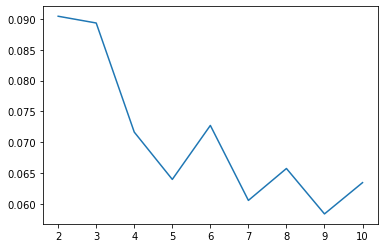

In [906]:
#silhouette_score Plot
plt.plot(range(2,11), sil_score);

In [908]:
churn["Clus_kmeans"].value_counts(normalize = True)

1    0.473535
2    0.370337
0    0.156128
Name: Clus_kmeans, dtype: float64

In [909]:
churn.groupby(["Clus_kmeans"]).count()


,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,sil_width
Clus_kmeans,,,,,,,,,,,,,,,,,,,
0,1758,1714,1758,1741,1758,1758,1758,1696,1758,1758,1758,1644,1758,1758,1758,1699,1679,1758,1758
1,5332,5231,5332,5283,5332,5332,5332,5124,5332,5332,5332,4965,5332,5329,5331,5154,5113,5332,5332
2,4170,4097,4170,4134,4170,4170,4170,3996,4170,4170,4170,3860,4170,4170,4168,4049,3995,4170,4170


<AxesSubplot:xlabel='Clus_kmeans', ylabel='Tenure'>

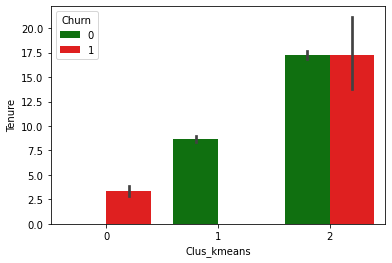

In [910]:
sns.barplot(churn['Clus_kmeans'], churn['Tenure'],hue=churn['Churn'], palette =['g','r'])

<AxesSubplot:xlabel='Clus_kmeans', ylabel='rev_per_month'>

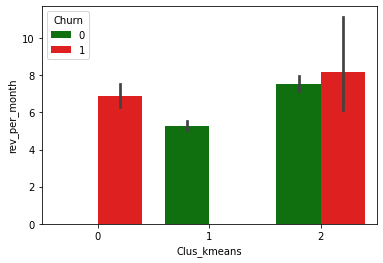

In [911]:
sns.barplot(churn['Clus_kmeans'], churn['rev_per_month'],hue=churn['Churn'], palette =['g','r'])

<AxesSubplot:xlabel='Clus_kmeans', ylabel='rev_growth_yoy'>

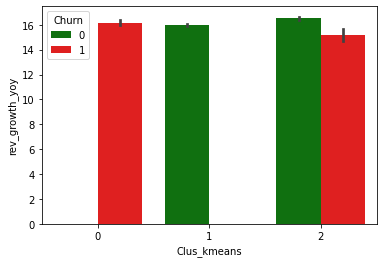

In [912]:
sns.barplot(churn['Clus_kmeans'], churn['rev_growth_yoy'],hue=churn['Churn'], palette =['g','r'])

<AxesSubplot:xlabel='Clus_kmeans', ylabel='cashback'>

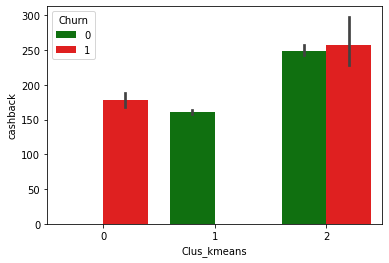

In [917]:
sns.barplot(churn['Clus_kmeans'], churn['cashback'],hue=churn['Churn'], palette =['g','r'])

<AxesSubplot:xlabel='Clus_kmeans', ylabel='City_Tier'>

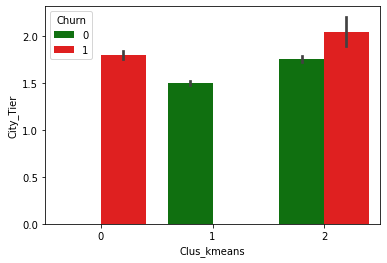

In [918]:
sns.barplot(churn['Clus_kmeans'], churn['City_Tier'],hue=churn['Churn'], palette =['g','r'])

<AxesSubplot:xlabel='Clus_kmeans', ylabel='account_segment'>

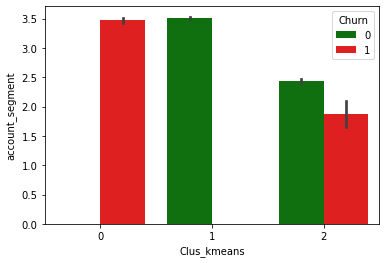

In [919]:
sns.barplot(churn['Clus_kmeans'], churn['account_segment'],hue=churn['Churn'], palette =['g','r'])

<AxesSubplot:xlabel='Clus_kmeans', ylabel='Service_Score'>

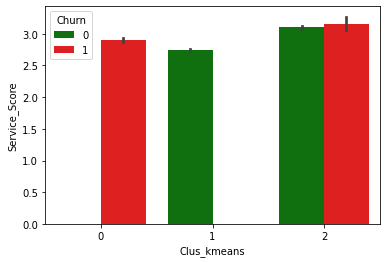

In [920]:
sns.barplot(churn['Clus_kmeans'], churn['Service_Score'],hue=churn['Churn'], palette =['g','r'])

<AxesSubplot:xlabel='Clus_kmeans', ylabel='Marital_Status'>

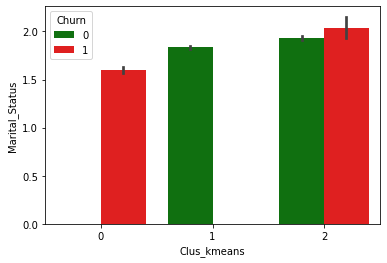

In [916]:
sns.barplot(churn['Clus_kmeans'], churn['Marital_Status'],hue=churn['Churn'], palette =['g','r'])

<AxesSubplot:xlabel='Clus_kmeans', ylabel='Day_Since_CC_connect'>

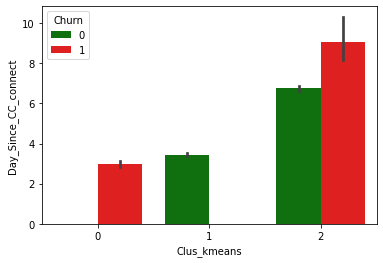

In [921]:
sns.barplot(churn['Clus_kmeans'], churn['Day_Since_CC_connect'],hue=churn['Churn'], palette =['g','r'])